In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import pandas as pd
import numpy as np
data=pd.read_csv("Heart_Disease_Prediction.csv")

In [17]:
data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
data.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [18]:
numerical=[var for var in data.columns if data[var].dtype!='object']
print('There are {} numerical variables\n',format(len(numerical)))
print('The numerical variables are: ',numerical)

There are {} numerical variables
 14
The numerical variables are:  ['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [19]:
categorical=[var for var in data.columns if data[var].dtype=='object']
print('There are {} categorical variables\n',format(len(categorical)))
print('The categorical variables are: ',categorical)

There are {} categorical variables
 1
The categorical variables are:  ['Heart Disease']


In [20]:
data.columns

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')

In [21]:
data = data.drop(columns=['index'])
print("Columns after dropping:")
print(data.columns)
data.to_csv('usable_features.csv', index=False)

Columns after dropping:
Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


In [22]:
numerical=[var for var in data.columns if data[var].dtype!='object']
print('There are {} numerical variables\n',format(len(numerical)))
print('The numerical variables are: ',numerical)

There are {} numerical variables
 13
The numerical variables are:  ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [23]:
data[numerical].describe

<bound method NDFrame.describe of      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exer

In [36]:
data['Heart Disease']=data['Heart Disease'].map({ 'Presence' : 1, 'Absence' : 0})

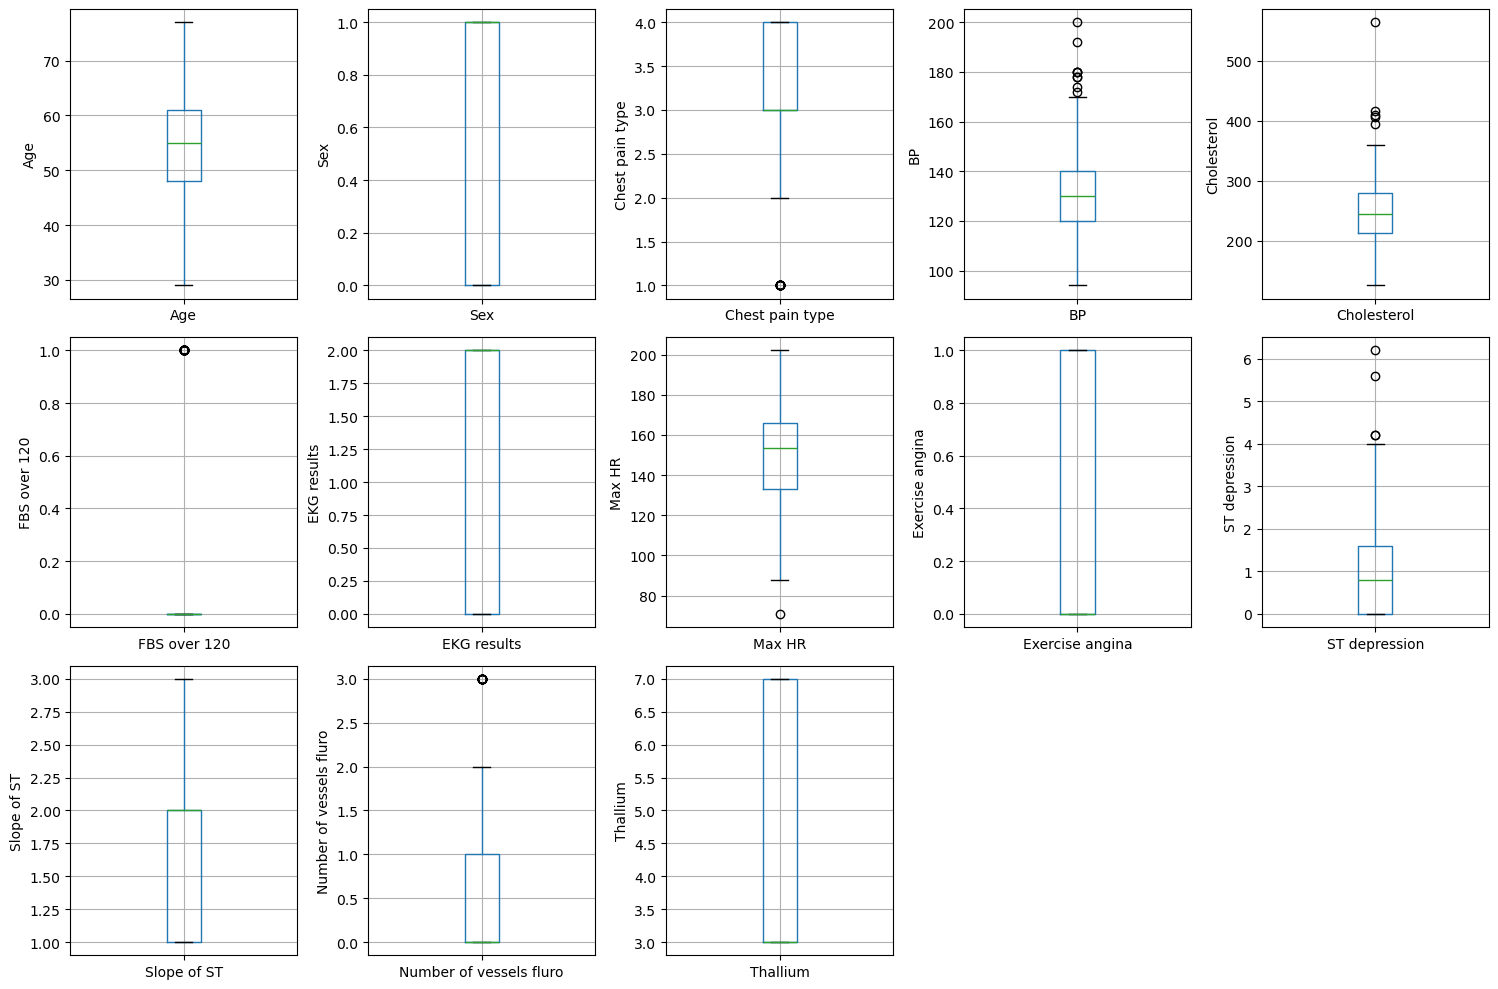

In [23]:
#plot box plots to check for outliers in the numerical columns data
plt.figure(figsize=(15, 10))

# Boxplot for 'Age'
plt.subplot(3, 5, 1)
fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_ylabel('Age')

# Boxplot for 'Sex'
plt.subplot(3, 5, 2)
fig = data.boxplot(column='Sex')
fig.set_title('')
fig.set_ylabel('Sex')

# Boxplot for 'Chest pain type'
plt.subplot(3, 5, 3)
fig = data.boxplot(column='Chest pain type')
fig.set_title('')
fig.set_ylabel('Chest pain type')

# Boxplot for 'BP'
plt.subplot(3, 5, 4)
fig = data.boxplot(column='BP')
fig.set_title('')
fig.set_ylabel('BP')

# Boxplot for 'Cholesterol'
plt.subplot(3, 5, 5)
fig = data.boxplot(column='Cholesterol')
fig.set_title('')
fig.set_ylabel('Cholesterol')

# Boxplot for 'FBS over 120'
plt.subplot(3, 5, 6)
fig = data.boxplot(column='FBS over 120')
fig.set_title('')
fig.set_ylabel('FBS over 120')

# Boxplot for 'EKG results'
plt.subplot(3, 5, 7)
fig = data.boxplot(column='EKG results')
fig.set_title('')
fig.set_ylabel('EKG results')

# Boxplot for 'Max HR'
plt.subplot(3, 5, 8)
fig = data.boxplot(column='Max HR')
fig.set_title('')
fig.set_ylabel('Max HR')

# Boxplot for 'Exercise angina'
plt.subplot(3, 5, 9)
fig = data.boxplot(column='Exercise angina')
fig.set_title('')
fig.set_ylabel('Exercise angina')

# Boxplot for 'ST depression'
plt.subplot(3, 5, 10)
fig = data.boxplot(column='ST depression')
fig.set_title('')
fig.set_ylabel('ST depression')

# Boxplot for 'Slope of ST'
plt.subplot(3, 5, 11)
fig = data.boxplot(column='Slope of ST')
fig.set_title('')
fig.set_ylabel('Slope of ST')

# Boxplot for 'Number of vessels fluro'
plt.subplot(3, 5, 12)
fig = data.boxplot(column='Number of vessels fluro')
fig.set_title('')
fig.set_ylabel('Number of vessels fluro')

# Boxplot for 'Thallium'
plt.subplot(3, 5, 13)
fig = data.boxplot(column='Thallium')
fig.set_title('')
fig.set_ylabel('Thallium')

plt.tight_layout()
plt.show()


In [24]:
IQR=data.BP.quantile(0.75)-data.BP.quantile(0.25)
lower_fence=data.BP.quantile(0.25)-(IQR*3)
upper_fence=data.BP.quantile(0.75)+(IQR*3)
print('BP outliers are values< {lowerboundary} or >{upperboundary}'.format(lowerboundary=lower_fence,upperboundary=upper_fence))

BP outliers are values< 60.0 or >200.0


In [25]:
IQR=data.Cholesterol.quantile(0.75)-data.Cholesterol.quantile(0.25)
lower_fence=data.Cholesterol.quantile(0.25)-(IQR*3)
upper_fence=data.Cholesterol.quantile(0.75)+(IQR*3)
print('Cholesterol outliers are values< {lowerboundary} or >{upperboundary}'.format(lowerboundary=lower_fence,upperboundary=upper_fence))

Cholesterol outliers are values< 12.0 or >481.0


In [26]:
IQR=data['ST depression'].quantile(0.75)-data['ST depression'].quantile(0.25)
lower_fence=data['ST depression'].quantile(0.25)-(IQR*3)
upper_fence=data['ST depression'].quantile(0.75)+(IQR*3)
print('ST depression outliers are values< {lowerboundary} or >{upperboundary}'.format(lowerboundary=lower_fence,upperboundary=upper_fence))

ST depression outliers are values< -4.800000000000001 or >6.4


In [27]:
IQR=data['Number of vessels fluro'].quantile(0.75)-data['Number of vessels fluro'].quantile(0.25)
lower_fence=data['Number of vessels fluro'].quantile(0.25)-(IQR*3)
upper_fence=data['Number of vessels fluro'].quantile(0.75)+(IQR*3)
print('Number of vessels fluro outliers are values< {lowerboundary} or >{upperboundary}'.format(lowerboundary=lower_fence,upperboundary=upper_fence))

Number of vessels fluro outliers are values< -3.0 or >4.0


In [30]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Assuming 'data' is your DataFrame containing the dataset
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']
# Define preprocessing steps for numerical and categorical variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Append classifier to preprocessing pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7592592592592593
